<a href="https://colab.research.google.com/github/Nikita45677/Nikitaa_4/blob/main/AIPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


===== DATASET =====
  Transaction_ID Payment_Method  Amount   Status    Failure_Reason
0           T001            UPI     500  Success              None
1           T002    Credit Card    1200   Failed     Network Error
2           T003     Debit Card     800  Success              None
3           T004            UPI     300   Failed  Bank Server Down
4           T005    Net Banking    1500   Failed           Timeout
5           T006    Credit Card    2000  Success              None
6           T007            UPI     700   Failed     Incorrect PIN
7           T008     Debit Card    1000  Success              None
8           T009    Net Banking     600   Failed     Network Error
9           T010    Credit Card     900  Success              None

===== DATASET INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Transaction_ID  10 non

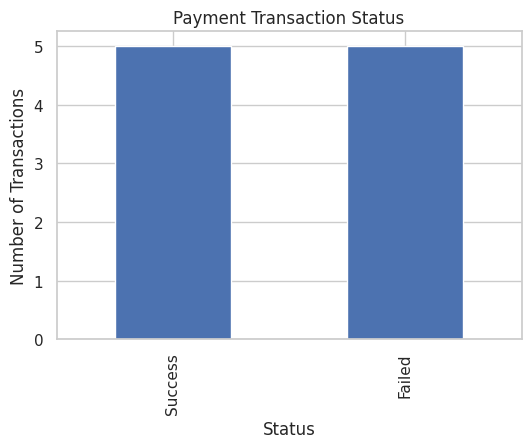

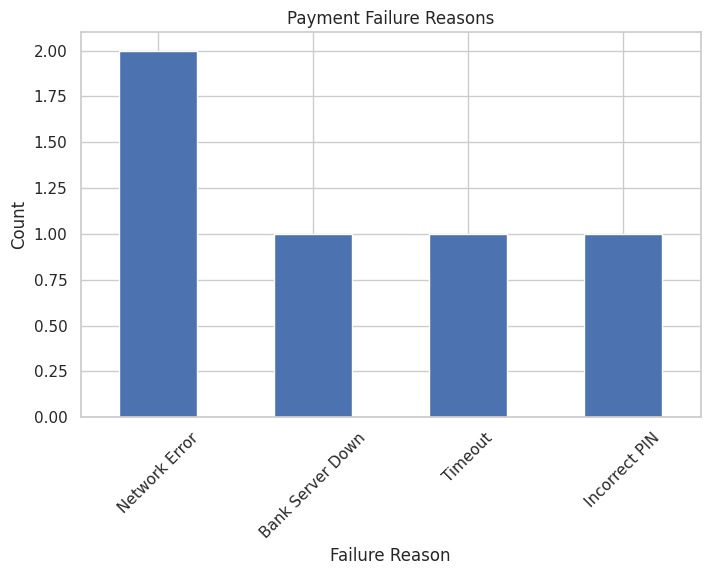


Payment Method Wise Success / Failure (%)
Status              Failed     Success
Payment_Method                        
Credit Card      33.333333   66.666667
Debit Card        0.000000  100.000000
Net Banking     100.000000    0.000000
UPI              66.666667   33.333333


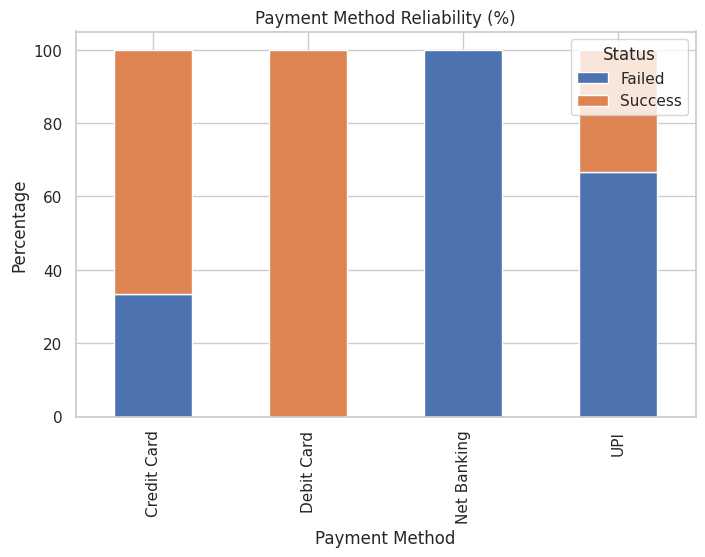


===== ANALYSIS COMPLETED SUCCESSFULLY =====


In [14]:
# =========================================
# ONLINE PAYMENT FAILURE RATE ANALYSIS
# Minor 1 - Exploratory Data Analysis (EDA)
# =========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------
# STEP 1: Create Dataset (No CSV Required)
# -----------------------------------------
data = {
    "Transaction_ID": ["T001","T002","T003","T004","T005",
                       "T006","T007","T008","T009","T010"],

    "Payment_Method": ["UPI","Credit Card","Debit Card","UPI","Net Banking",
                       "Credit Card","UPI","Debit Card","Net Banking","Credit Card"],

    "Amount": [500,1200,800,300,1500,2000,700,1000,600,900],

    "Status": ["Success","Failed","Success","Failed","Failed",
               "Success","Failed","Success","Failed","Success"],

    "Failure_Reason": ["None","Network Error","None","Bank Server Down","Timeout",
                       "None","Incorrect PIN","None","Network Error","None"]
}

df = pd.DataFrame(data)

print("\n===== DATASET =====")
print(df)

# -----------------------------------------
# STEP 2: Basic Information
# -----------------------------------------
print("\n===== DATASET INFO =====")
print(df.info())

# -----------------------------------------
# STEP 3: Total Transactions
# -----------------------------------------
total = len(df)
print("\nTotal Transactions:", total)

# -----------------------------------------
# STEP 4: Success vs Failure Count
# -----------------------------------------
status_count = df["Status"].value_counts()
print("\nTransaction Status Count:")
print(status_count)

# -----------------------------------------
# STEP 5: Failure Rate Calculation
# -----------------------------------------
failed = status_count.get("Failed", 0)
success = status_count.get("Success", 0)

failure_rate = (failed / total) * 100
success_rate = (success / total) * 100

print(f"\nFailure Rate: {failure_rate:.2f}%")
print(f"Success Rate: {success_rate:.2f}%")

# -----------------------------------------
# STEP 6: Failure Reason Analysis
# -----------------------------------------
failure_reasons = df[df["Status"] == "Failed"]["Failure_Reason"].value_counts()

print("\nFailure Reasons:")
print(failure_reasons)

# -----------------------------------------
# STEP 7: Visualization - Success vs Failure
# -----------------------------------------
sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
status_count.plot(kind="bar")
plt.title("Payment Transaction Status")
plt.xlabel("Status")
plt.ylabel("Number of Transactions")
plt.show()

# -----------------------------------------
# STEP 8: Visualization - Failure Reasons
# -----------------------------------------
plt.figure(figsize=(8,5))
failure_reasons.plot(kind="bar")
plt.title("Payment Failure Reasons")
plt.xlabel("Failure Reason")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# -----------------------------------------
# STEP 9: Payment Method Reliability
# -----------------------------------------
payment_method_analysis = pd.crosstab(
    df["Payment_Method"],
    df["Status"],
    normalize="index"
) * 100

print("\nPayment Method Wise Success / Failure (%)")
print(payment_method_analysis)

# -----------------------------------------
# STEP 10: Visualization - Reliability
# -----------------------------------------
payment_method_analysis.plot(
    kind="bar",
    stacked=True,
    figsize=(8,5)
)

plt.title("Payment Method Reliability (%)")
plt.xlabel("Payment Method")
plt.ylabel("Percentage")
plt.legend(title="Status")
plt.show()

print("\n===== ANALYSIS COMPLETED SUCCESSFULLY =====")